# Prepare a prediction model for profit of 50_startups data.



Do transformations for getting better predictions of profit and
Make a table containing R^2 value for each prepared model.

In [64]:
import pandas as pd #Data Manipulation
import seaborn as sns #Data Visualization
import numpy as np #Numerical Python
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

In [65]:
#Reading file
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [66]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

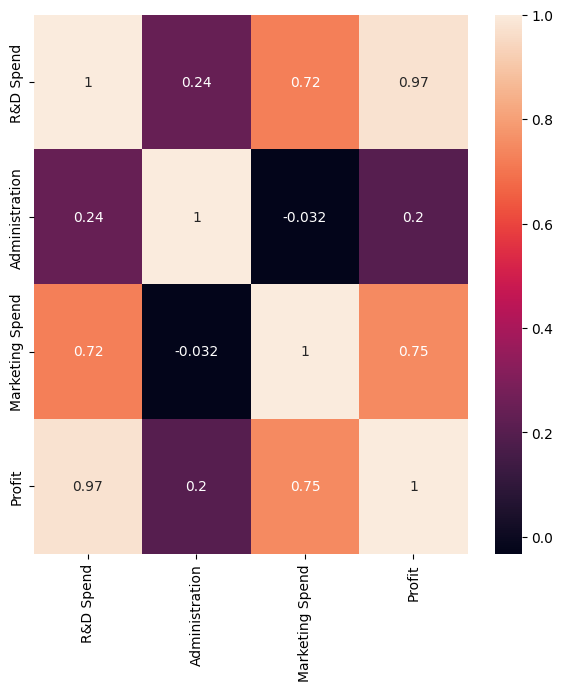

In [67]:
sns.heatmap(df.corr(),annot=True)

In [68]:
df.shape

(50, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [70]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [71]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [72]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [73]:
df.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


# Feature Engineering

In [74]:
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing'},axis=1)
df.head()

,RnD,admin,marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# checking for null value

In [75]:
df.isnull().sum() #no Null Values

RnD          0
admin        0
marketing    0
State        0
Profit       0
dtype: int64

In [76]:
df[df.values==0.0]

,RnD,admin,marketing,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [77]:
print('Zero Values in R&D ',(df['RnD'] == 0).sum(),'\n'
      'Zero Values in Administration ',(df['admin'] == 0).sum(),'\n'
      'Zero Values in Marketing ',(df['marketing'] == 0).sum(),'\n'
      'Zero Values in Profit ',(df['Profit'] == 0).sum())

Zero Values in R&D  2 
Zero Values in Administration  0 
Zero Values in Marketing  3 
Zero Values in Profit  0


In [78]:
df.duplicated().sum() #no duplicate value

0

# Data visualization

Text(0.5, 1.0, 'before transfromation')

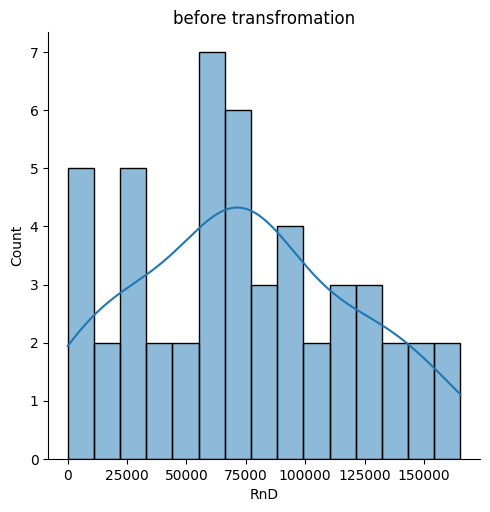

In [79]:
sns.displot((df['RnD']), bins = 15, kde = True)
plt.title('before transfromation')

Text(0.5, 1.0, 'before transfromation')

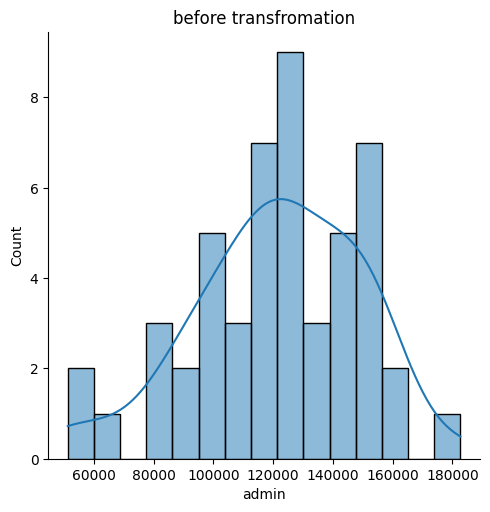

In [80]:
sns.displot((df['admin']), bins = 15, kde = True)
plt.title('before transfromation')

Text(0.5, 1.0, 'before transfromation')

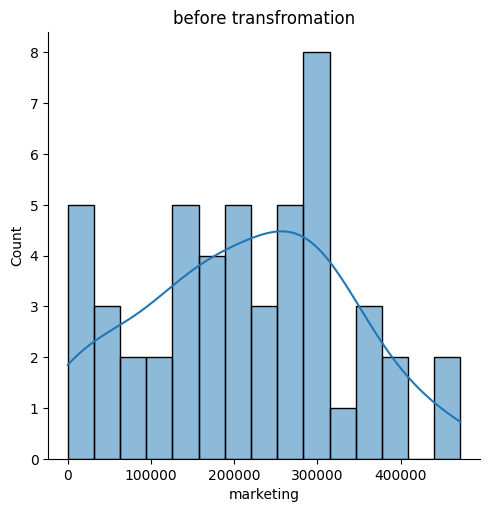

In [81]:
sns.displot((df['marketing']), bins = 15, kde = True)
plt.title('before transfromation')

# After transformation Data visualization

Text(0.5, 1.0, 'after transfromation')

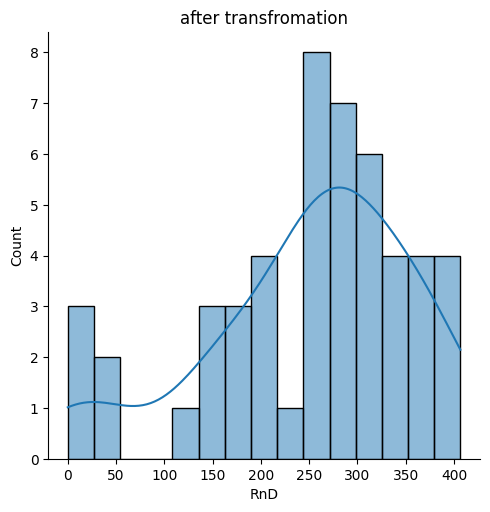

In [82]:
sns.displot(np.sqrt(df['RnD']), bins = 15, kde = True)
plt.title('after transfromation')

Text(0.5, 1.0, 'after transfromation')

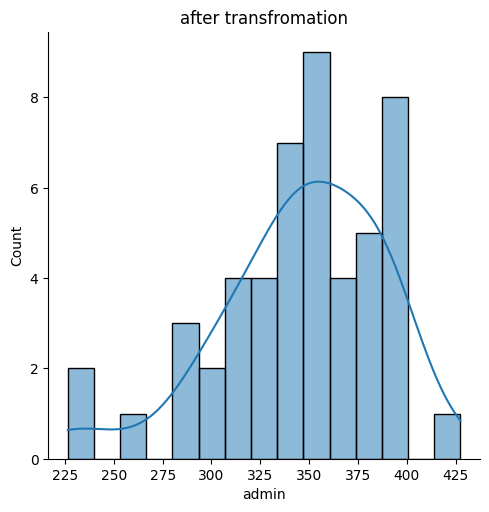

In [83]:
sns.displot(np.sqrt(df['admin']), bins = 15, kde = True)
plt.title('after transfromation')

Text(0.5, 1.0, 'after transfromation')

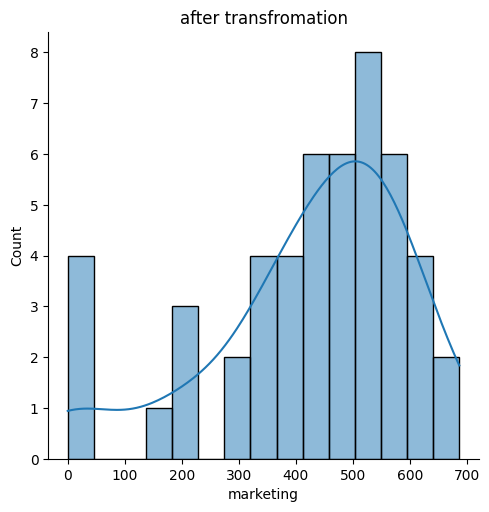

In [84]:
sns.displot(np.sqrt(df['marketing']), bins = 15, kde = True)
plt.title('after transfromation')

In [85]:
#Profit is the target variable & remaining are the features

In [86]:
from matplotlib import rcParams

Text(0, 0.5, 'Profit Range')

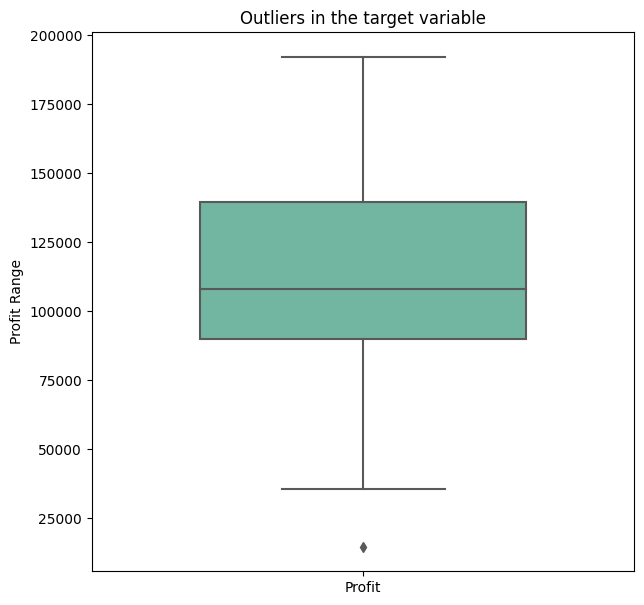

In [87]:
outliers = ['Profit']
rcParams['figure.figsize'] = 7,7
sns.boxplot(data=df[outliers], orient="v", palette="Set2" , width=0.6,) 
plt.title("Outliers in the target variable")
plt.ylabel("Profit Range")


<AxesSubplot:ylabel='State'>

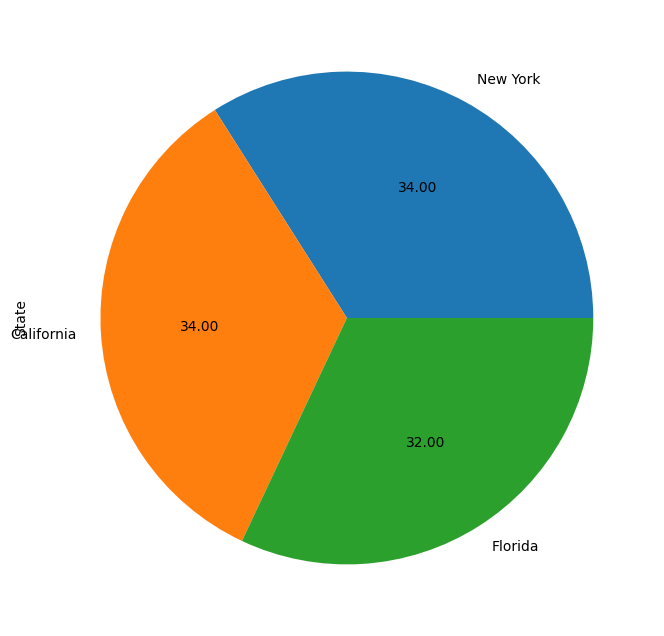

In [88]:
plt.figure(figsize=(8,8))
df['State'].value_counts().plot(kind='pie',autopct= '%.2f')

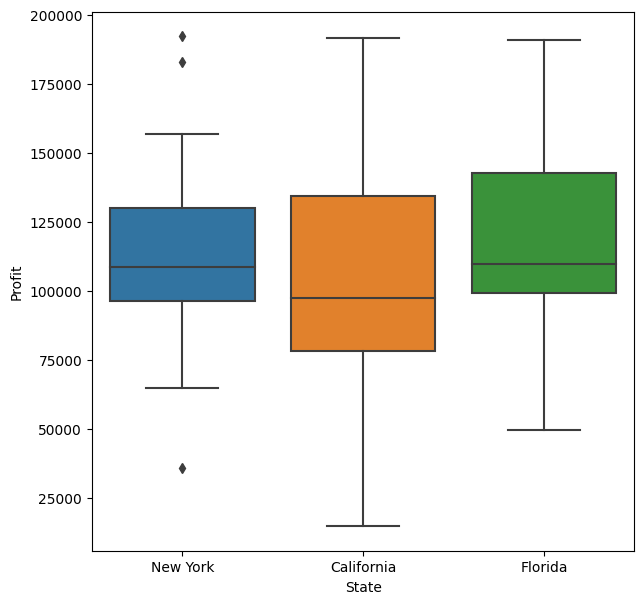

In [89]:
sns.boxplot(x ='State', y ='Profit', data = df)
plt.show()

All outliers presented are in New York.

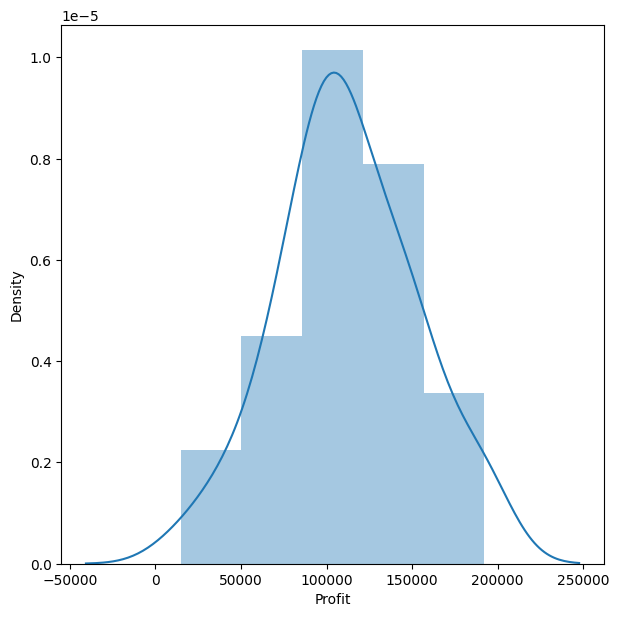

In [90]:
sns.distplot(df['Profit'],bins=5,kde=True)
plt.show()

The average profit is 100k

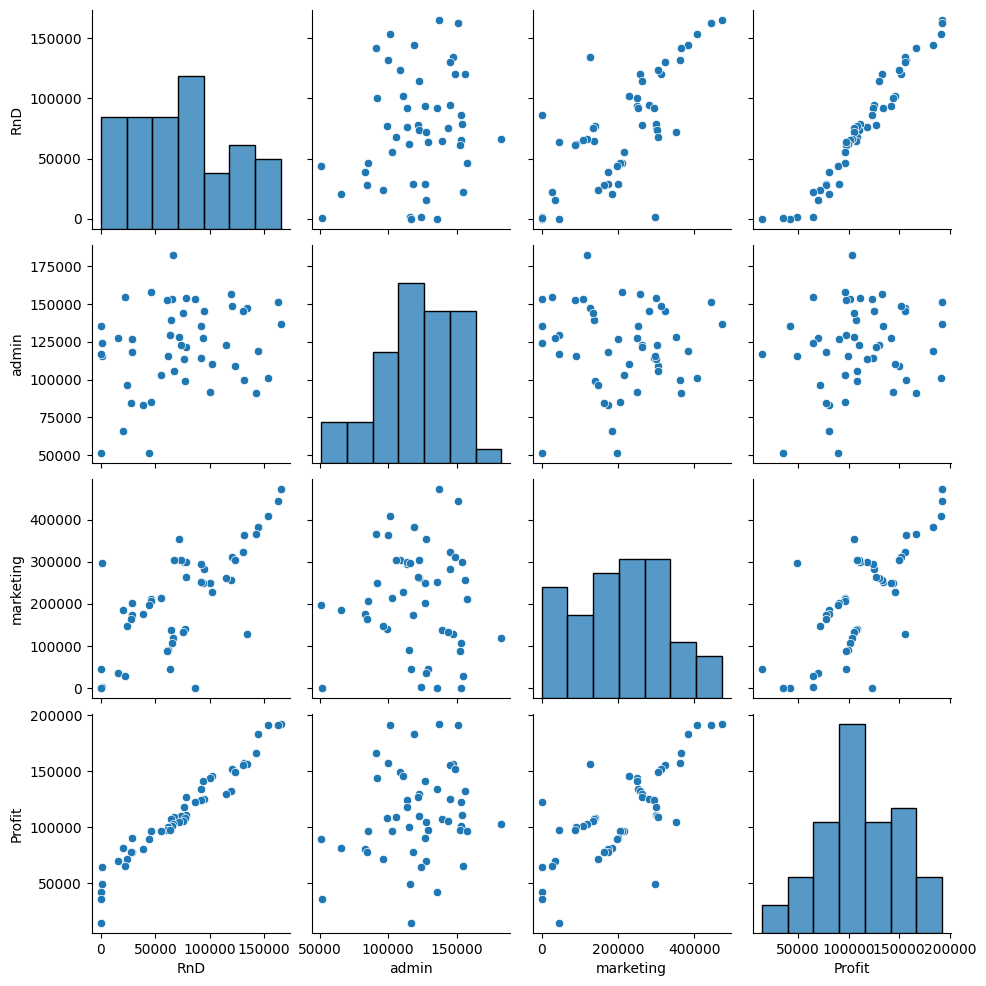

In [91]:
sns.pairplot(df)
plt.show()

# Model Building

In [92]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [93]:
model=smf.ols("Profit~RnD+marketing+admin",data=df).fit()

# Model Testing

In [94]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RnD              0.805715
marketing        0.027228
admin           -0.026816
dtype: float64

In [95]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RnD          17.846374
 marketing     1.655077
 admin        -0.525507
 dtype: float64,
 Intercept    0.00000
 RnD          0.00000
 marketing    0.10472
 admin        0.60176
 dtype: float64)

In [96]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  

(0.9507459940683246, 0.9475337762901719)

In [97]:
# Build SLR for variable 'admin' 
# Also finding their tvalues and pvalues
slr_a = smf.ols("Profit~admin",data=df).fit()
slr_a.tvalues , slr_a.pvalues  # admin has in-significant pvalue

(Intercept    3.040044
 admin        1.419493
 dtype: float64,
 Intercept    0.003824
 admin        0.162217
 dtype: float64)

In [98]:
# Build SLR for variable 'marketing'
slr_m = smf.ols("Profit~marketing",data=df).fit()
slr_m.tvalues , slr_m.pvalues  # marketing has significant pvalue

(Intercept    7.808356
 marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 marketing    4.381073e-10
 dtype: float64)

In [99]:
# build MLR for variables admin & marketing
mlr_am = smf.ols("Profit~admin+marketing",data=df).fit()
mlr_am.tvalues , mlr_am.pvalues  
#varaibles have significant pvalues

(Intercept    1.142741
 admin        2.467779
 marketing    8.281039
 dtype: float64,
 Intercept    2.589341e-01
 admin        1.729198e-02
 marketing    9.727245e-11
 dtype: float64)

In [100]:
mlr_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           2.50e-10
Time:                        18:47:00   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
admin          0.3237      0.131      2.468      0.017       0.060       0.588
marketing      0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
#base accuracy = 61%

# Model Validation

1. Collinearity Check & 2. Residual Analysis

In [102]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RnD~admin+marketing",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("admin~RnD+marketing",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("marketing~RnD+admin",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RnD','admin','marketing'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RnD,2.468903
1,admin,1.175091
2,marketing,2.326773


No collinearity

#  Residual Analysis

In [103]:
X = df.drop("Profit",axis=1)
df["Profit"] - model.predict(X)
model.resid.min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -3

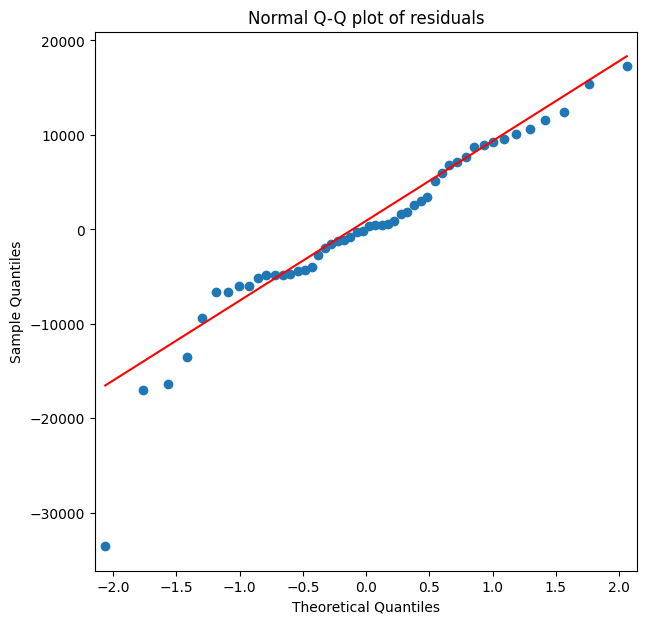

In [104]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals",)
plt.show()

In [105]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [106]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [107]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

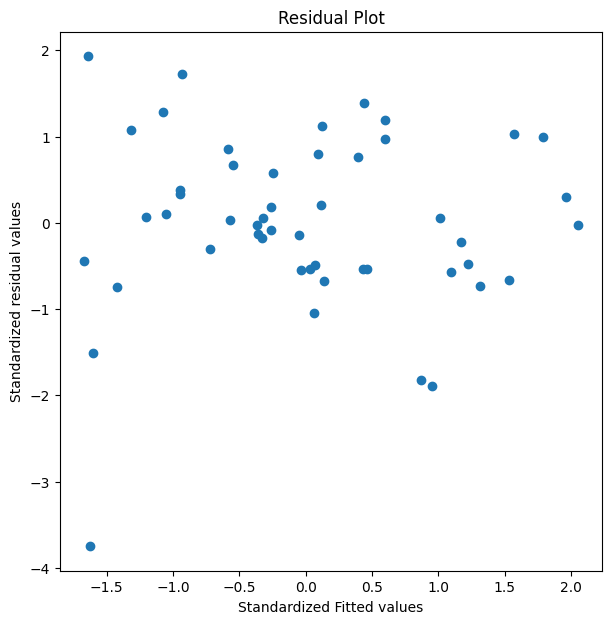

In [108]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


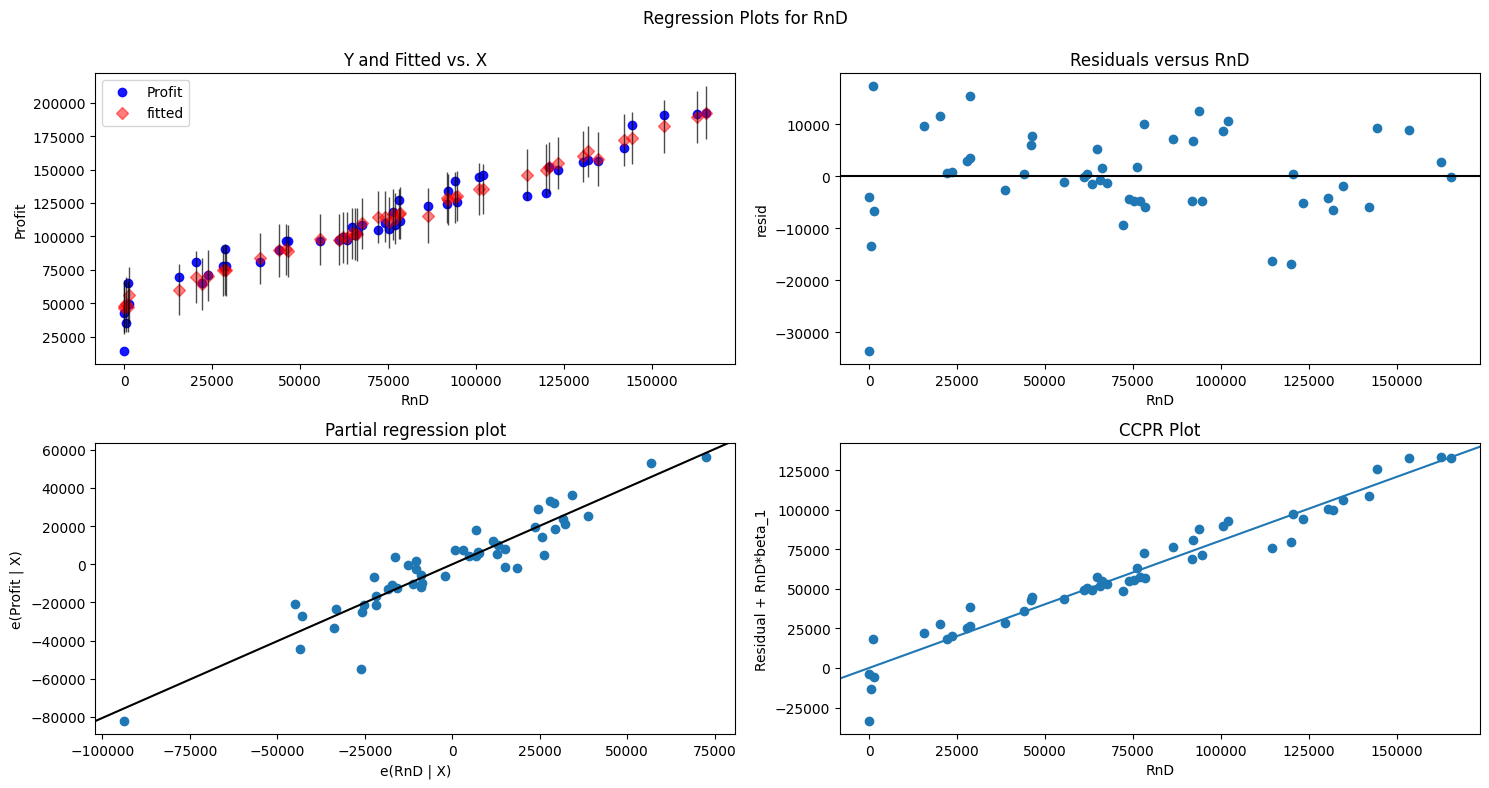

In [109]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'RnD', fig=fig)
plt.show()

eval_env: 1


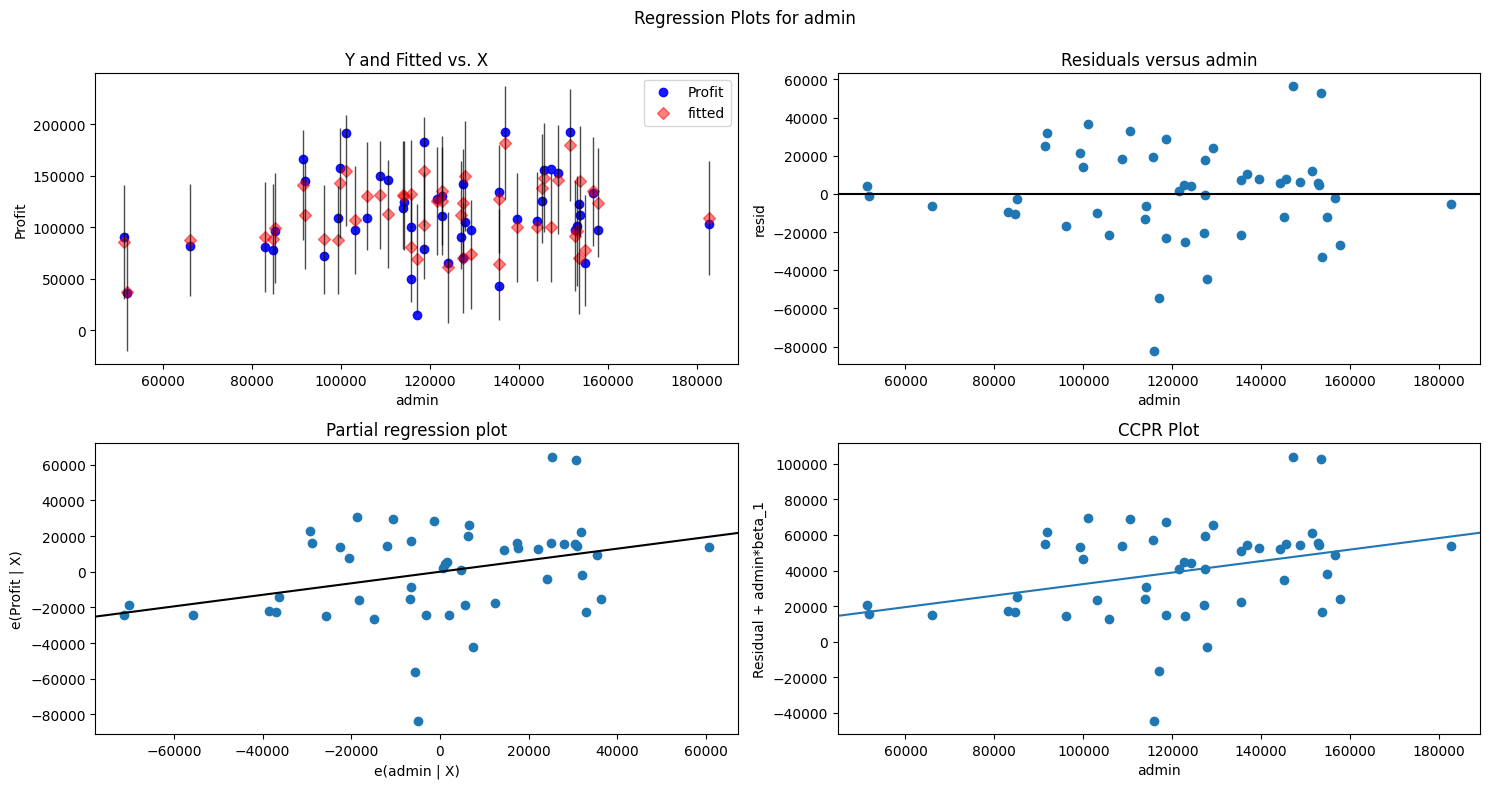

In [110]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mlr_am,'admin', fig=fig)
plt.show()

eval_env: 1


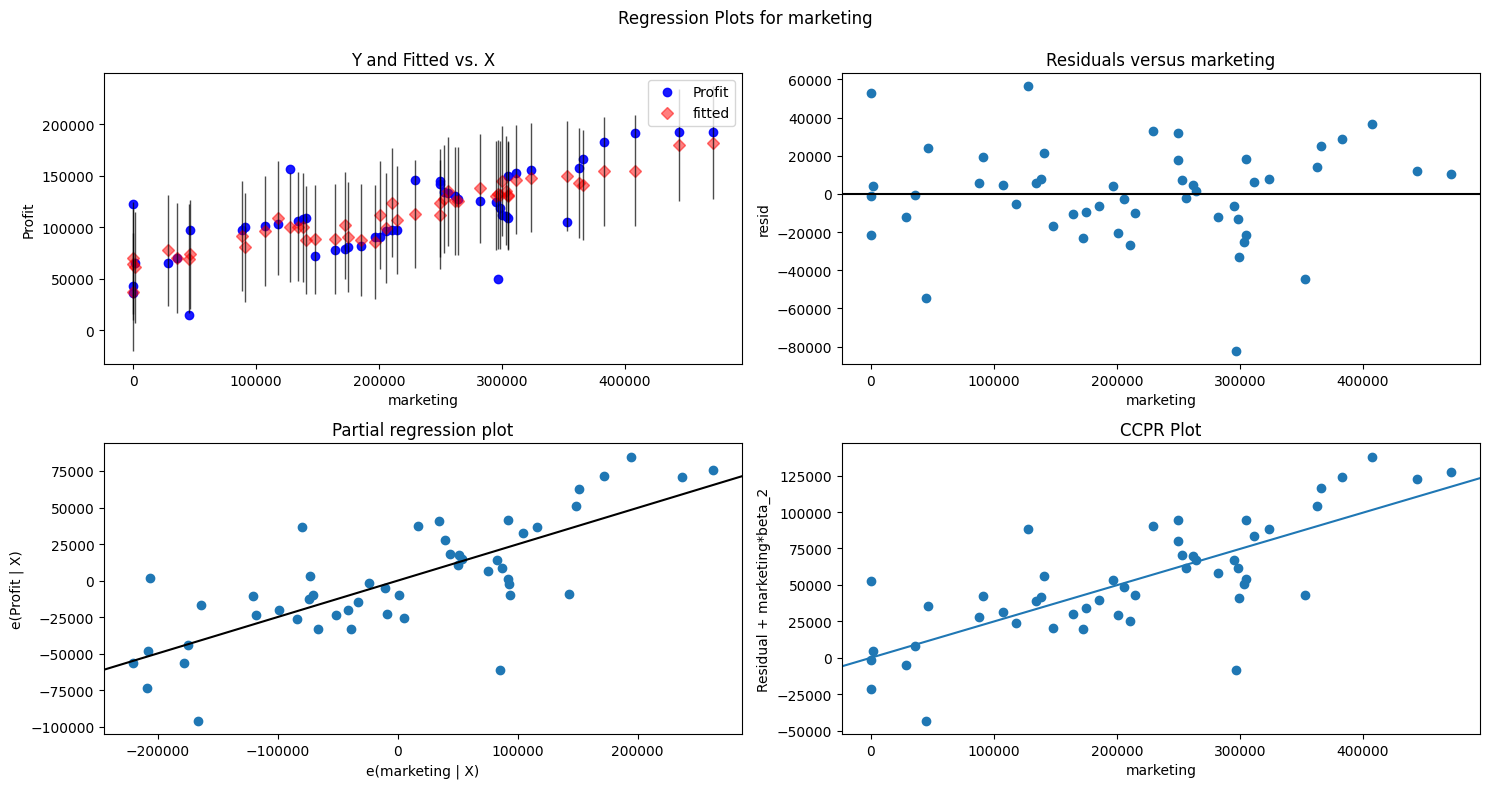

In [111]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mlr_am,'marketing', fig=fig)
plt.show()

# cook's distance

In [112]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [113]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

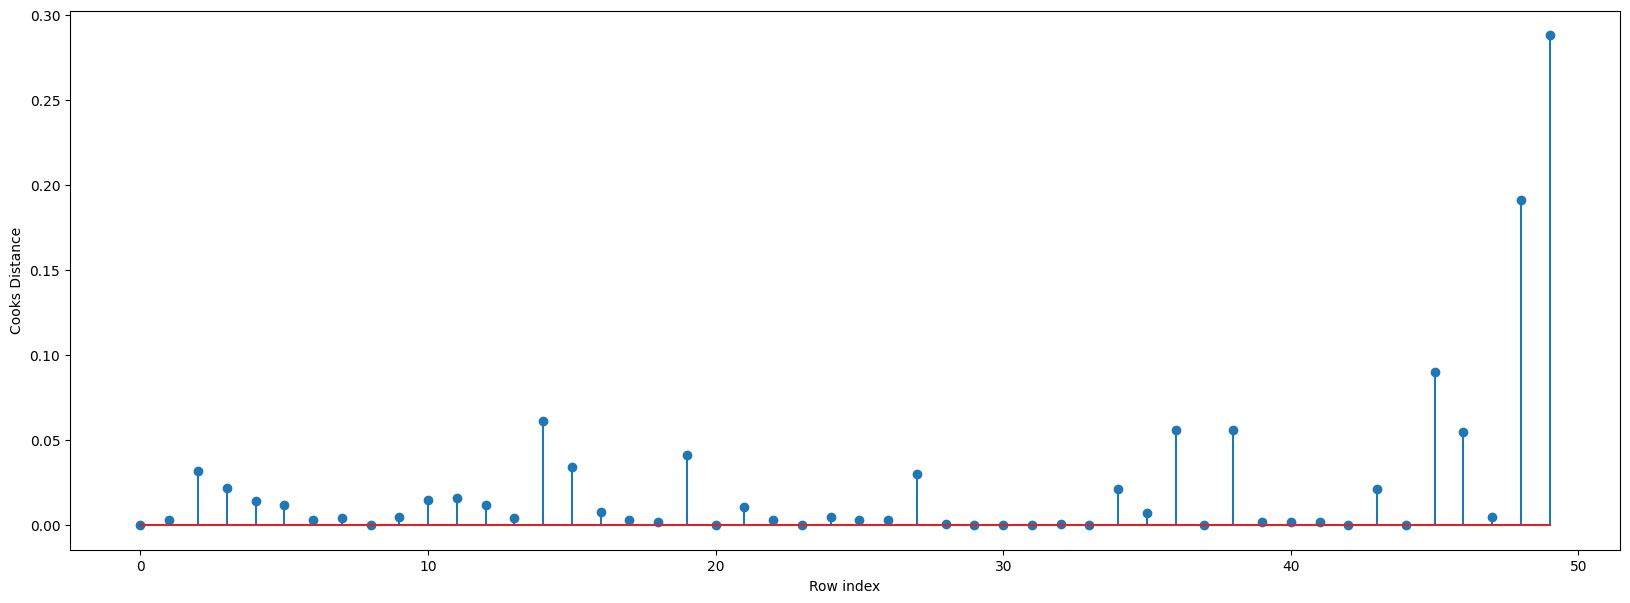

In [114]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [115]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432573)

# high influence points

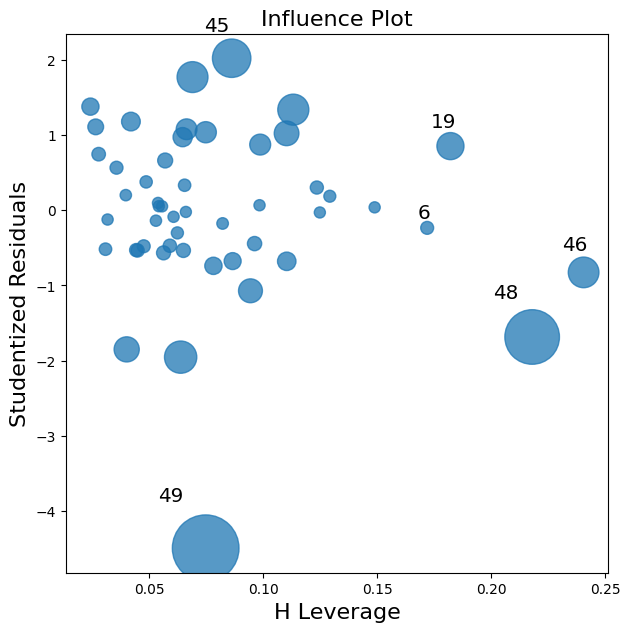

In [116]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [117]:
# Leverage Cuttoff Value = 3*(k+1)/n 
# k = no.of features/columns & n = no. of datapoints
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [118]:
df[df.index.isin([49])] 

,RnD,admin,marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model

In [119]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df1=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df1

,RnD,admin,marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Model Deletion Diagnostics and Final Model

In [120]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RnD+admin+marketing",data=df1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RnD+admin+marketing",data=df1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to ",final_model.rsquared,"from base model accuracy")

Thus model accuracy is improved to  0.9613162435129847 from base model accuracy


In [121]:
final_model.rsquared

0.9613162435129847

In [122]:
df1

,RnD,admin,marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Predictions

In [123]:
# say New data for prediction is
new_data=pd.DataFrame({'RnD':50000,"admin":50000,"marketing":100000},index=[0])
new_data

,RnD,admin,marketing
0,50000,50000,100000


In [124]:
# Manual Prediction of Price
final_model.predict(new_data)


0    92945.826979
dtype: float64

In [125]:
pred_y=final_model.predict(df1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [126]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
